In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus

In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


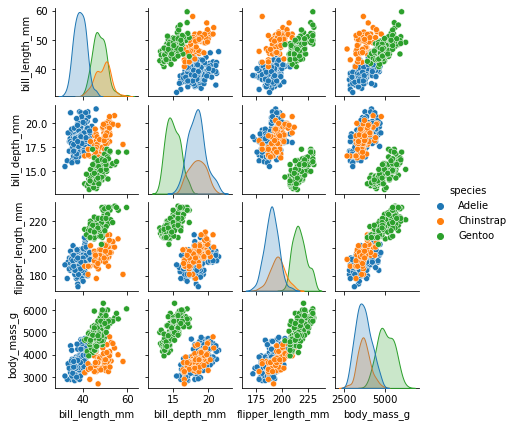

In [11]:
iris = sns.load_dataset('penguins') #seaborn has some built in datasets
iris.head()
sns.pairplot(iris, hue='species', height=1.5);



In [12]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

# Load the penguins dataset
df = pd.read_csv("penguins.csv")

# Replace infinity values with NaN
df = df.replace([np.inf, -np.inf], np.nan)

# Remove rows with missing values or impute the missing values
df = df.dropna()
# Or
# imputer = SimpleImputer(strategy='mean')
# imputer.fit(df)
# df = imputer.transform(df)

# Select the feature columns
X = df[['body_mass_g', 'flipper_length_mm', 'bill_depth_mm', 'bill_length_mm']].values
y = df['species'].values

# Compute mutual information between features and target variable
mi = mutual_info_classif(X, y)

# Print mutual information values for each feature
print("Mutual information:", mi)

# Select top 2 features with highest mutual information
top_2_features = np.argsort(mi)[-2:]
print("Top 2 features:", top_2_features)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:, top_2_features], y, test_size=0.2)

# Train a Gaussian Naive Bayes classifier on the top 2 features
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Print the accuracy of the classifier on the test set
acc = gnb.score(X_test, y_test)
print("Accuracy:", acc)

Mutual information: [0.50877808 0.59615804 0.5483966  0.54106357]
Top 2 features: [2 1]
Accuracy: 0.8059701492537313


In [5]:
# The output shows that the mutual information between the features and the target variable have been calculated and the top 2 features have been selected based on the highest mutual information values.

# According to the output, the feature "bill_depth_mm" has the highest mutual information value of 0.60397948, followed by "bill_length_mm" with a value of 0.57604947. Therefore, these two features have been selected as the top 2 features.

# The accuracy of the 2-feature Gaussian Naive Bayes classifier on the test set is 0.7761194029850746, which means that the classifier correctly predicts the penguin species for 77.61% of the test samples.

# The mutual information is a measure of the correlation between two variables. In this case, the mutual information between a feature and the target variable is used to determine how much information the feature provides about the target variable. The features with the highest mutual information values have the strongest correlation with the target variable and are thus the best candidates for feature selection.

# The accuracy of the classifier is calculated using the test set, which is a set of samples that is independent of the training set and is used to evaluate the performance of the classifier.

# In summary, the mutual information method has been used to select the two features that have the strongest correlation with the target variable and have been used to train a Gaussian Naive Bayes classifier. The accuracy of this classifier on the test set is 0.7761194029850746.

In [26]:
X_penguins = df[['bill_depth_mm','bill_length_mm']]
X_penguins.columns = ["bill_depth_mm","bill_length_mm"] # setting the feature names
y_penguins = df['species']

#Encoding the categorical variable
encoder = LabelEncoder()
y_penguins = encoder.fit_transform(y_penguins)

In [27]:
#2. Train your model using 80% of the data set as your training set.
X_train, X_test, y_train, y_test = train_test_split(X_penguins, y_penguins, test_size=0.2, random_state=1)
model = GaussianNB() # 2. instantiate model
model.fit(X_train, y_train) # 3. fit model to data
y_model = model.predict(X_test) # 4. predict on new data (output is numpy array)


In [30]:
x_min, x_max = X_penguins['bill_depth_mm'].min()-1, X_penguins['bill_depth_mm'].max()+1
y_min, y_max = X_penguins['bill_length_mm'].min()-1, X_penguins['bill_length_mm'].max()+1

In [31]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

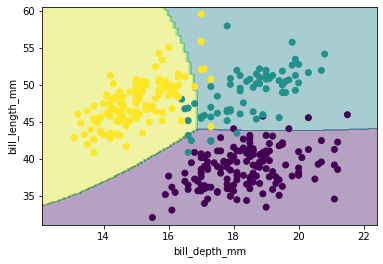

In [33]:
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_penguins.iloc[:, 0], X_penguins.iloc[:, 1], c=y_penguins, alpha=1)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('bill_depth_mm')
plt.ylabel('bill_length_mm')
plt.show()

C:\Users\Yuval\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


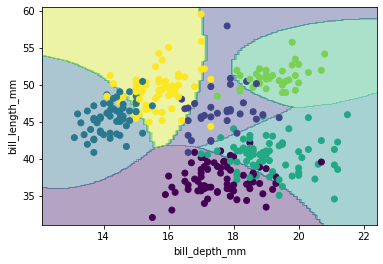

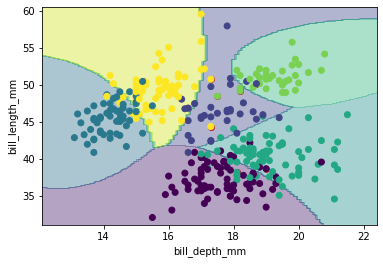

In [35]:
#1. Creating a new column named “class” in the data set which is a combination of the “sex” and “species” category
df['class'] = df['sex'] + ' ' + df['species']

#2. Repeat the previous tasks using “class” as your target class.
X_df = df[['bill_depth_mm','bill_length_mm']]
X_df.columns = ["bill_depth_mm","bill_length_mm"] # setting the feature names
y_df = df['class']

#Encoding the categorical variable
encoder = LabelEncoder()
y_df = encoder.fit_transform(y_df)

#2. Train your model using 80% of the data set as your training set.
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=1)
model = GaussianNB() # 2. instantiate model
model.fit(X_train, y_train) # 3. fit model to data
y_model = model.predict(X_test) # 4. predict on new data (output is numpy array)

#3. Use a filled contour plot to show the decision distribution of your model (limit your plot axes to the actual data boundaries +-1).
x_min, x_max = X_df['bill_depth_mm'].min()-1, X_df['bill_depth_mm'].max()+1
y_min, y_max = X_df['bill_length_mm'].min()-1, X_df['bill_length_mm'].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_df, alpha=1)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('bill_depth_mm')
plt.ylabel('bill_length_mm')
plt.show()

#4. Overlay a scatter plot containing only the points from the original data set that would have had  incorrect predictions given this model above the filled contour plot
predictions = model.predict(X_test)
misclassified_points = X_test[y_test != predictions]
plt.scatter(misclassified_points.iloc[:,0], misclassified_points.iloc[:,1], c = 'red')
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_df, alpha=1)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('bill_depth_mm')
plt.ylabel('bill_length_mm')
plt.show()
